IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import gc

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

IMPORTING THE DATASET

In [3]:
raw_data = pd.read_csv('/car_data.csv')

In [4]:
raw_data.head(25)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


EXPLORATORY ANALYSIS OF THE RAW DATA

In [5]:
print(raw_data.shape)

(301, 9)


In [6]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data.describe())
print('\nThe number of unique values in the Car_Name is : ' + str(len(raw_data['Car_Name'].unique())))
print('\nThe number of unique values in the Year column is : ' + str(len(raw_data['Year'].unique())))
print('\nThe number of unique values in the Selling_Price column is : ' + str(len(raw_data['Selling_Price'].unique())))
print('\nThe number of unique values in the Present_Price column is : ' + str(len(raw_data['Present_Price'].unique())))
print('\nThe number of unique values in the Driven_kms column is : ' + str(len(raw_data['Driven_kms'].unique())))
print('\nThe number of unique values in the Fuel_Type column is : ' + str(len(raw_data['Fuel_Type'].unique())))
print('\nThe number of unique values in the Selling_type column is : ' + str(len(raw_data['Selling_type'].unique())))
print('\nThe number of unique values in the Transmission column is : ' + str(len(raw_data['Transmission'].unique())))
print('\nThe number of unique values in the Owner column is : ' + str(len(raw_data['Owner'].unique())))


The number of null values in the dataset is : 
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

The number of duplicate values in the dataset is : 2

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

The data distrib

DATA PREPROCESSING

In [7]:
car_data = raw_data

#Replacing the Year with age with respect to 2023
car_data['Age'] = 2023 - car_data['Year']
cloned_car_data = car_data
car_data = car_data.drop(['Year'], axis = 1)

#Encoding the fuel_type Values
fuel_encoder = LabelEncoder()
car_data['Fuel_Type'] = fuel_encoder.fit_transform(np.array(car_data['Fuel_Type']).reshape(-1,1))

#Encoding the Selling_type Values
selling_type_encoder = LabelEncoder()
car_data['Selling_type'] = selling_type_encoder.fit_transform(np.array(car_data['Selling_type']).reshape(-1,1))

#Encoding the Selling_type Values
transmission_encoder = LabelEncoder()
car_data['Transmission'] = transmission_encoder.fit_transform(np.array(car_data['Transmission']).reshape(-1,1))

EXPLORATORY ANALYSIS OF THE PROCESSED DATA

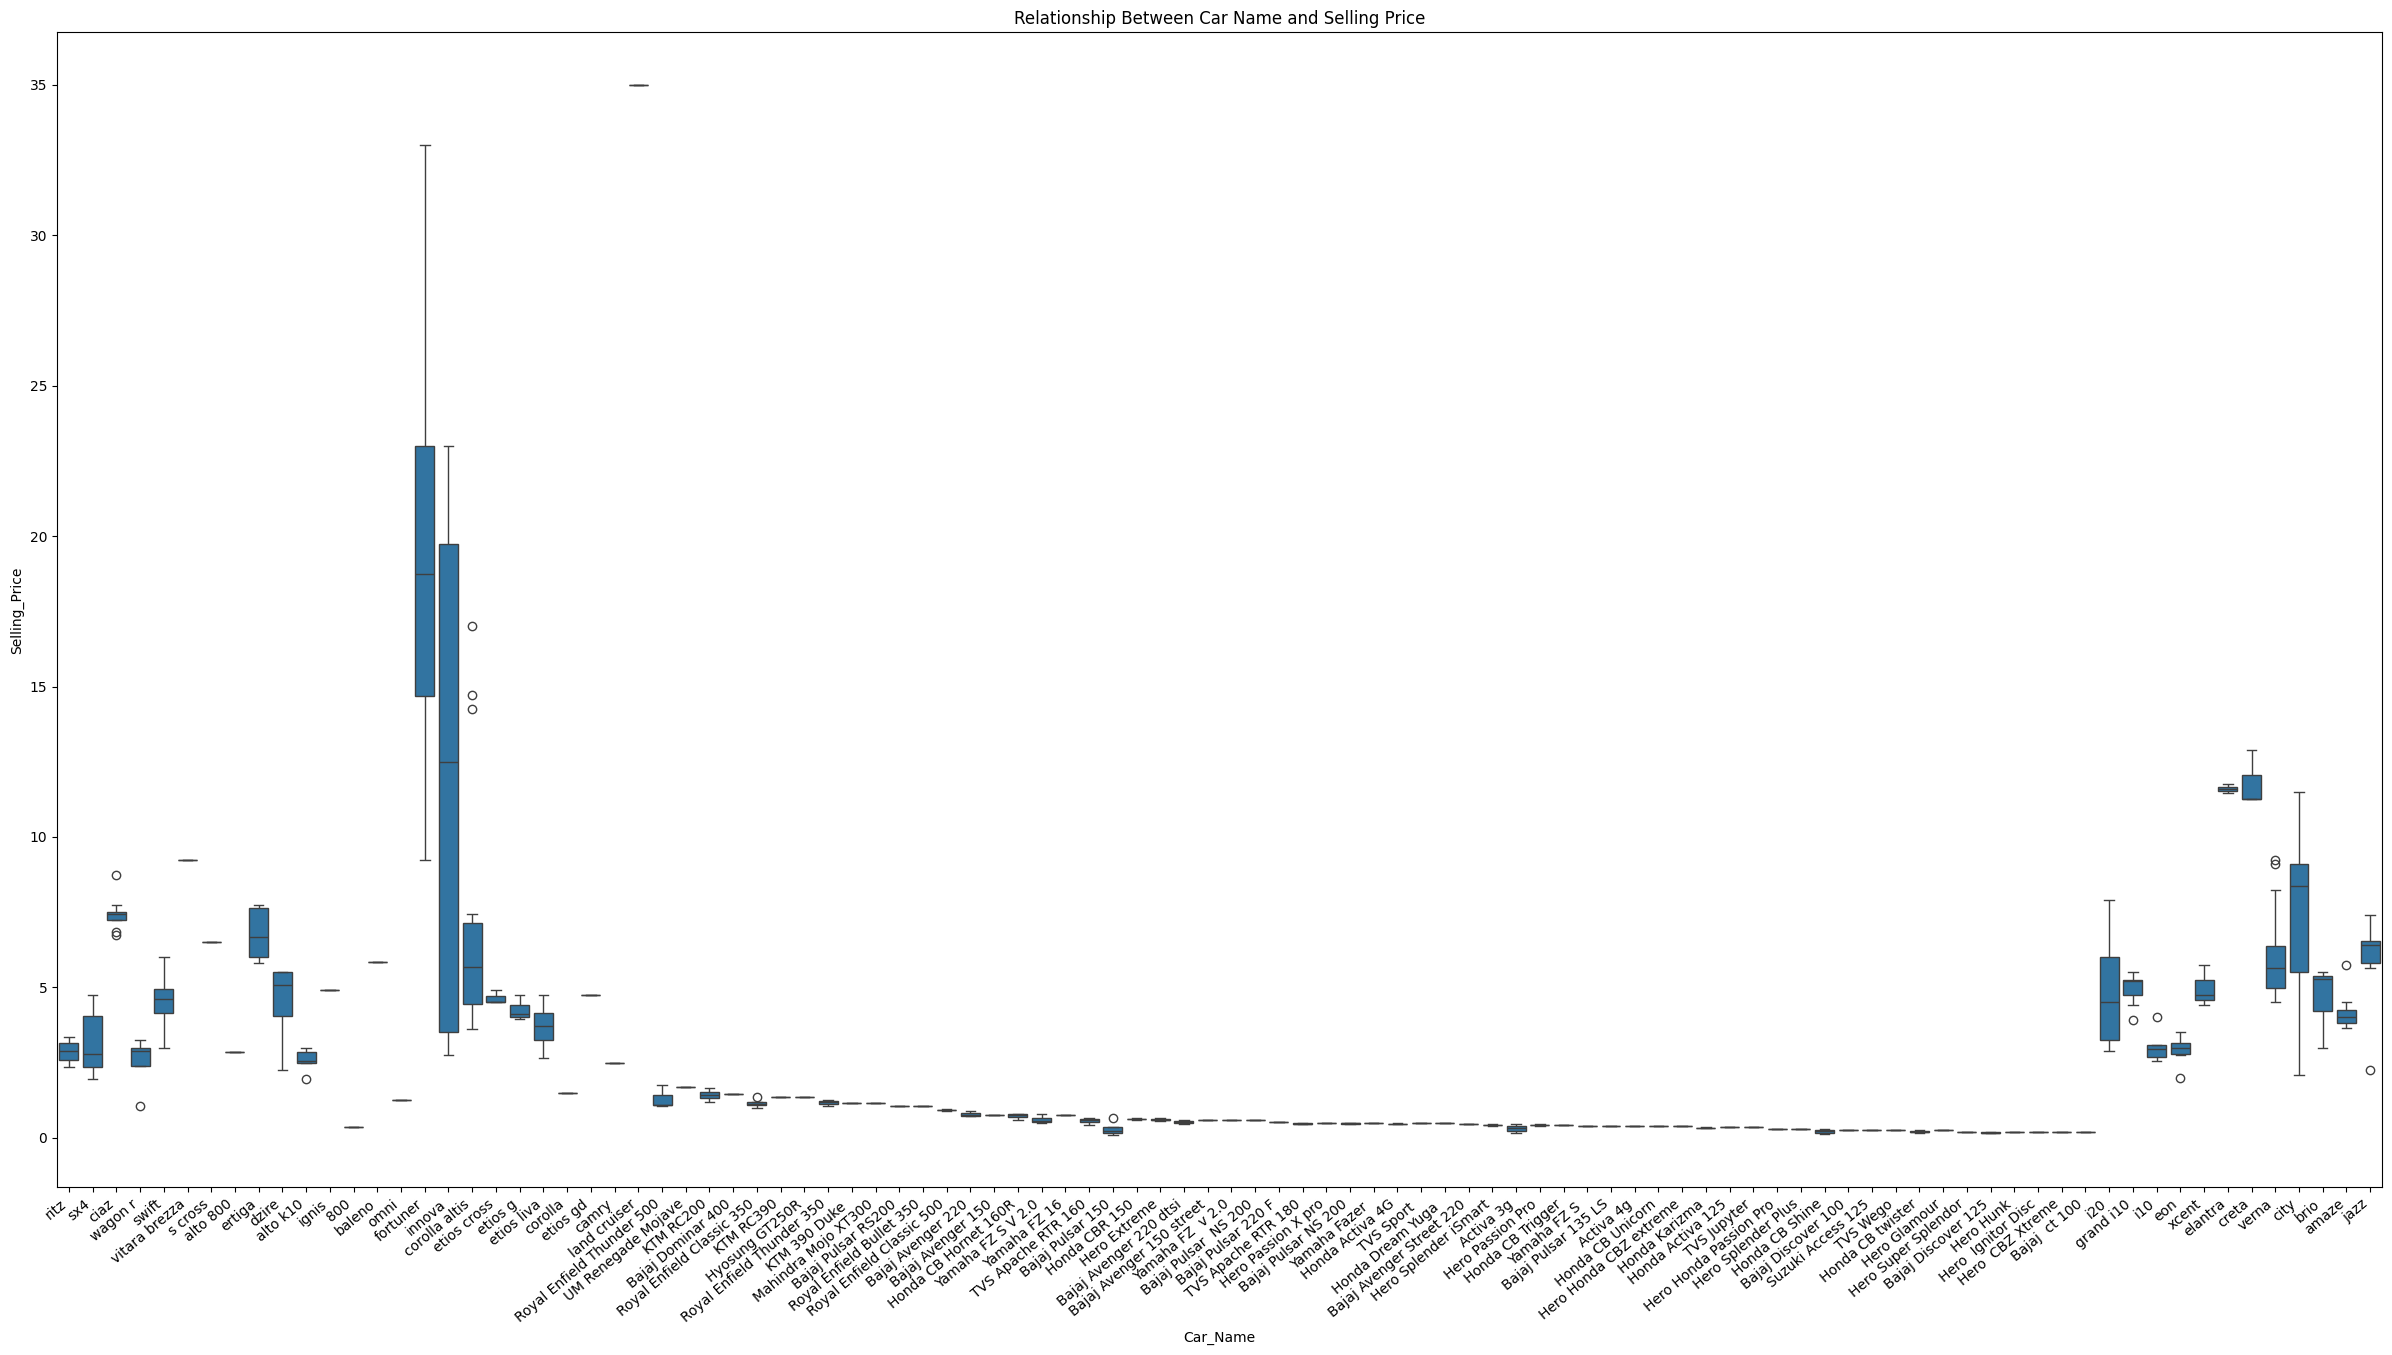

In [9]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (30,15))
ax=sns.boxplot(x='Car_Name',y='Selling_Price',data=car_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title('Relationship Between Car Name and Selling Price')
plt.show()

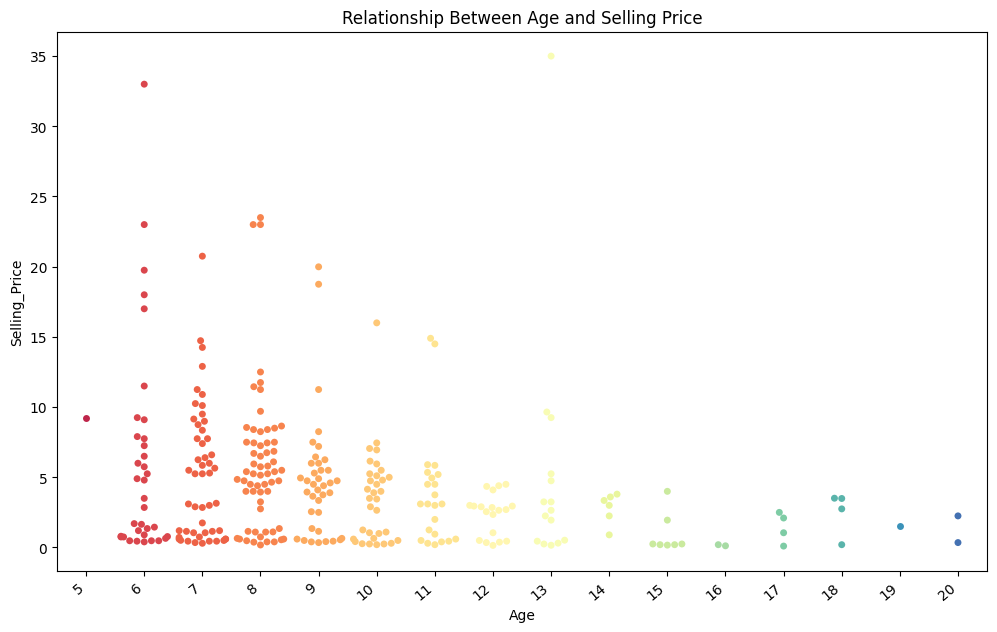

In [10]:
plt.figure(figsize = (12,7))
ax=sns.swarmplot(x='Age',y='Selling_Price',data=car_data, palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title('Relationship Between Age and Selling Price')
plt.show()

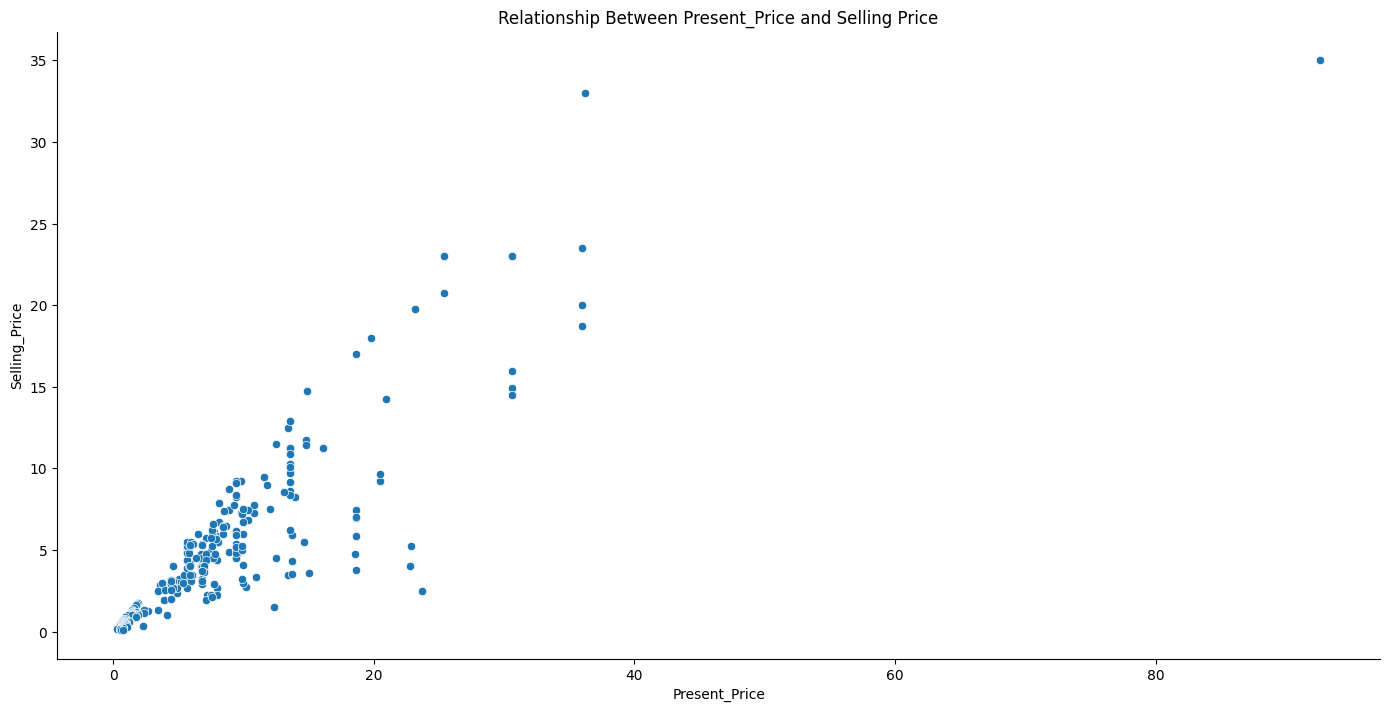

In [11]:
sns.relplot(x='Present_Price',y='Selling_Price', data=car_data, height = 7, aspect = 2, palette = 'Spectral')
plt.title('Relationship Between Present_Price and Selling Price')
plt.show()

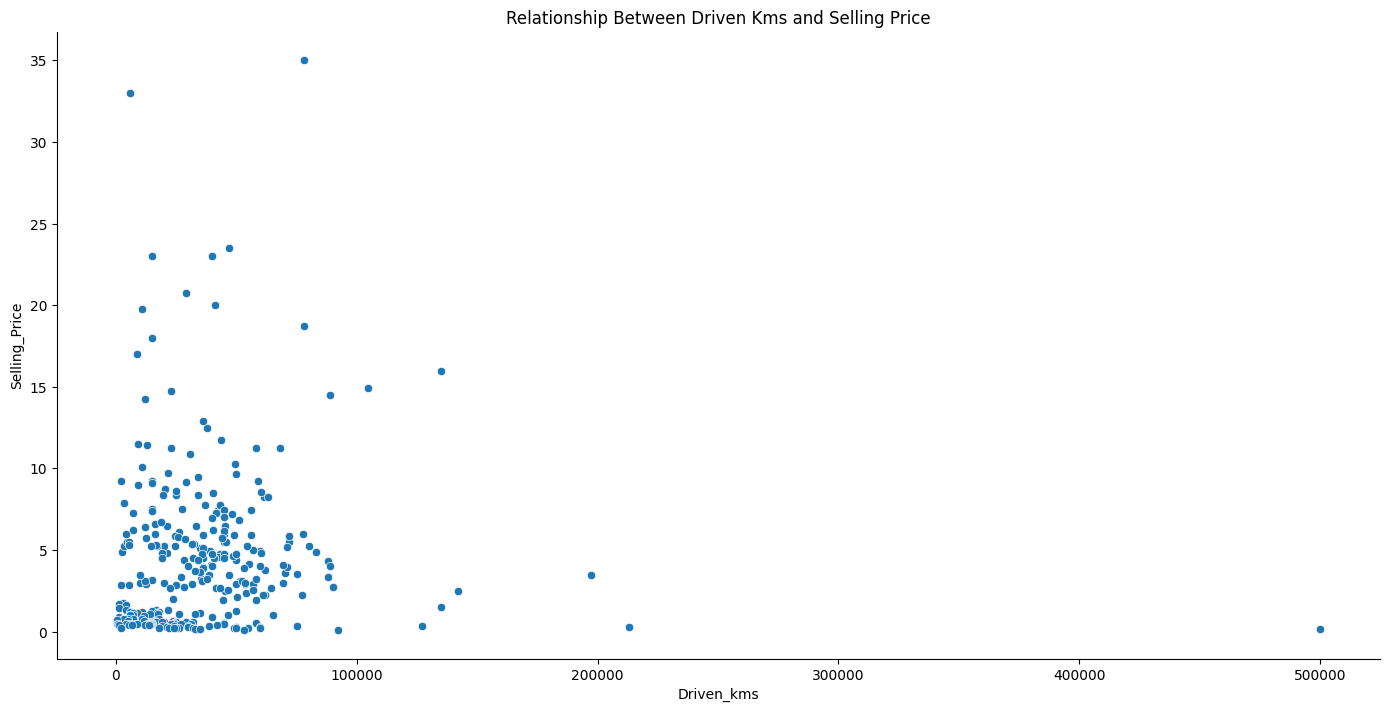

In [12]:
sns.relplot(x='Driven_kms',y='Selling_Price', data=car_data, height = 7, aspect = 2, palette = 'Spectral')
plt.title('Relationship Between Driven Kms and Selling Price')
plt.show()

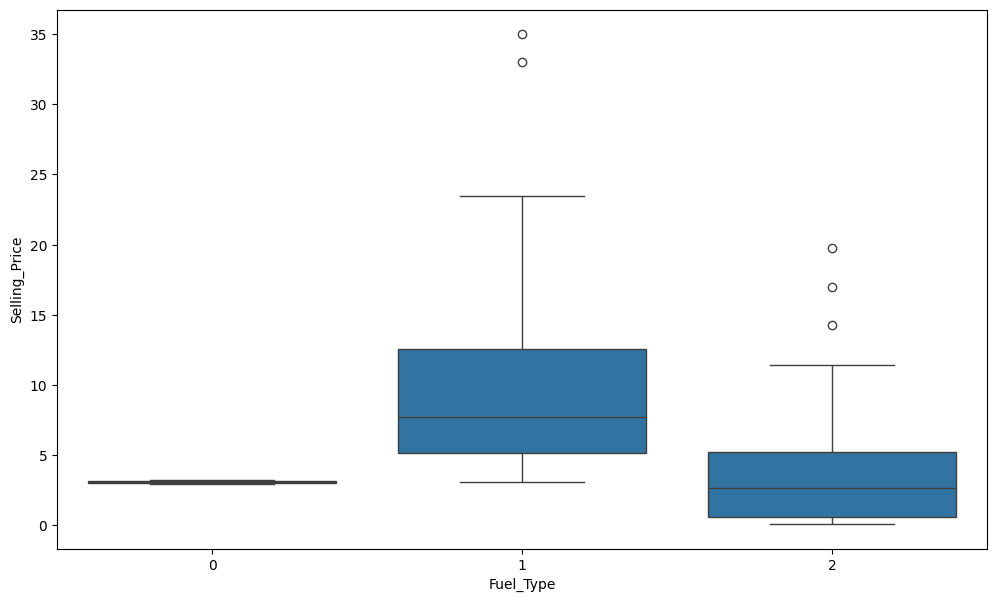

In [13]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=car_data)
plt.show()

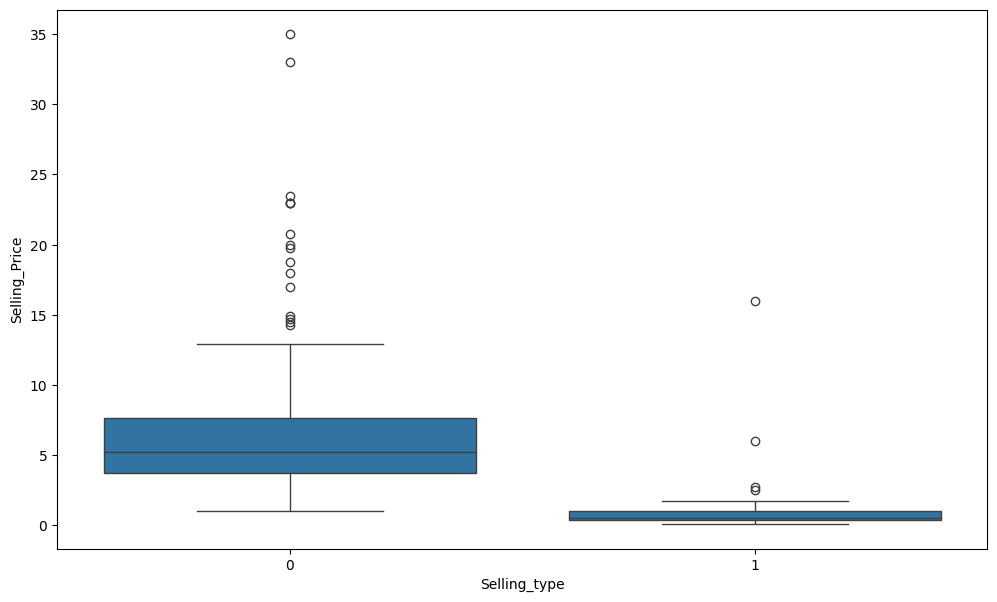

In [14]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Selling_type',y='Selling_Price',data=car_data)
plt.show()

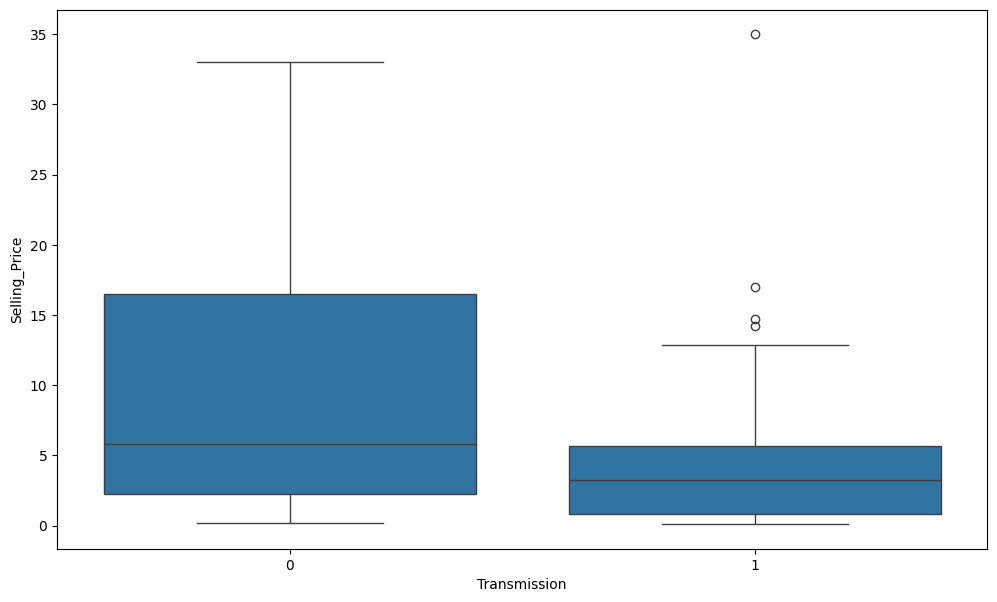

In [15]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Transmission',y='Selling_Price',data=car_data)
plt.show()

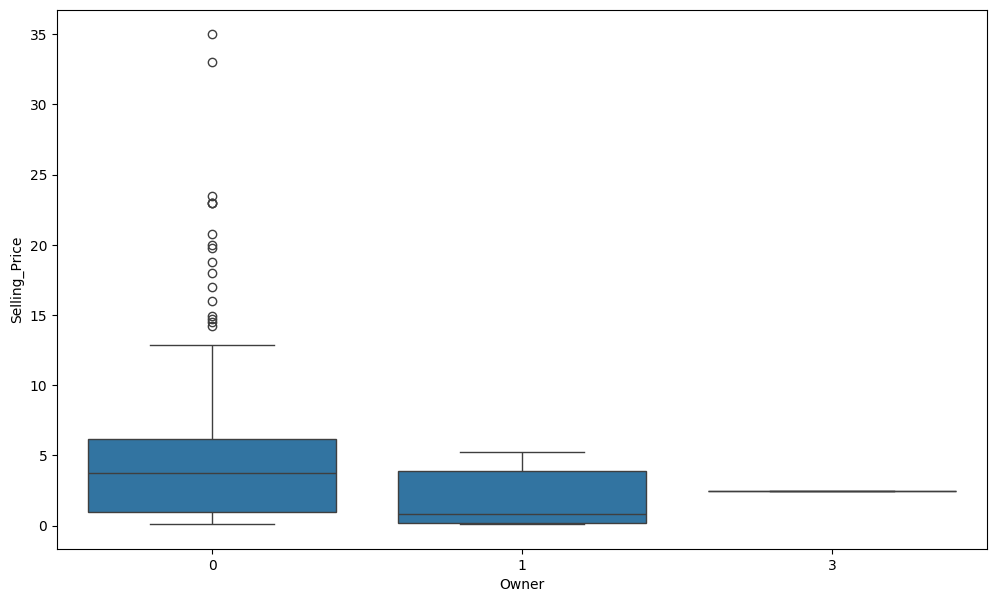

In [16]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Owner',y='Selling_Price',data=car_data)
plt.show()

<Figure size 640x480 with 0 Axes>

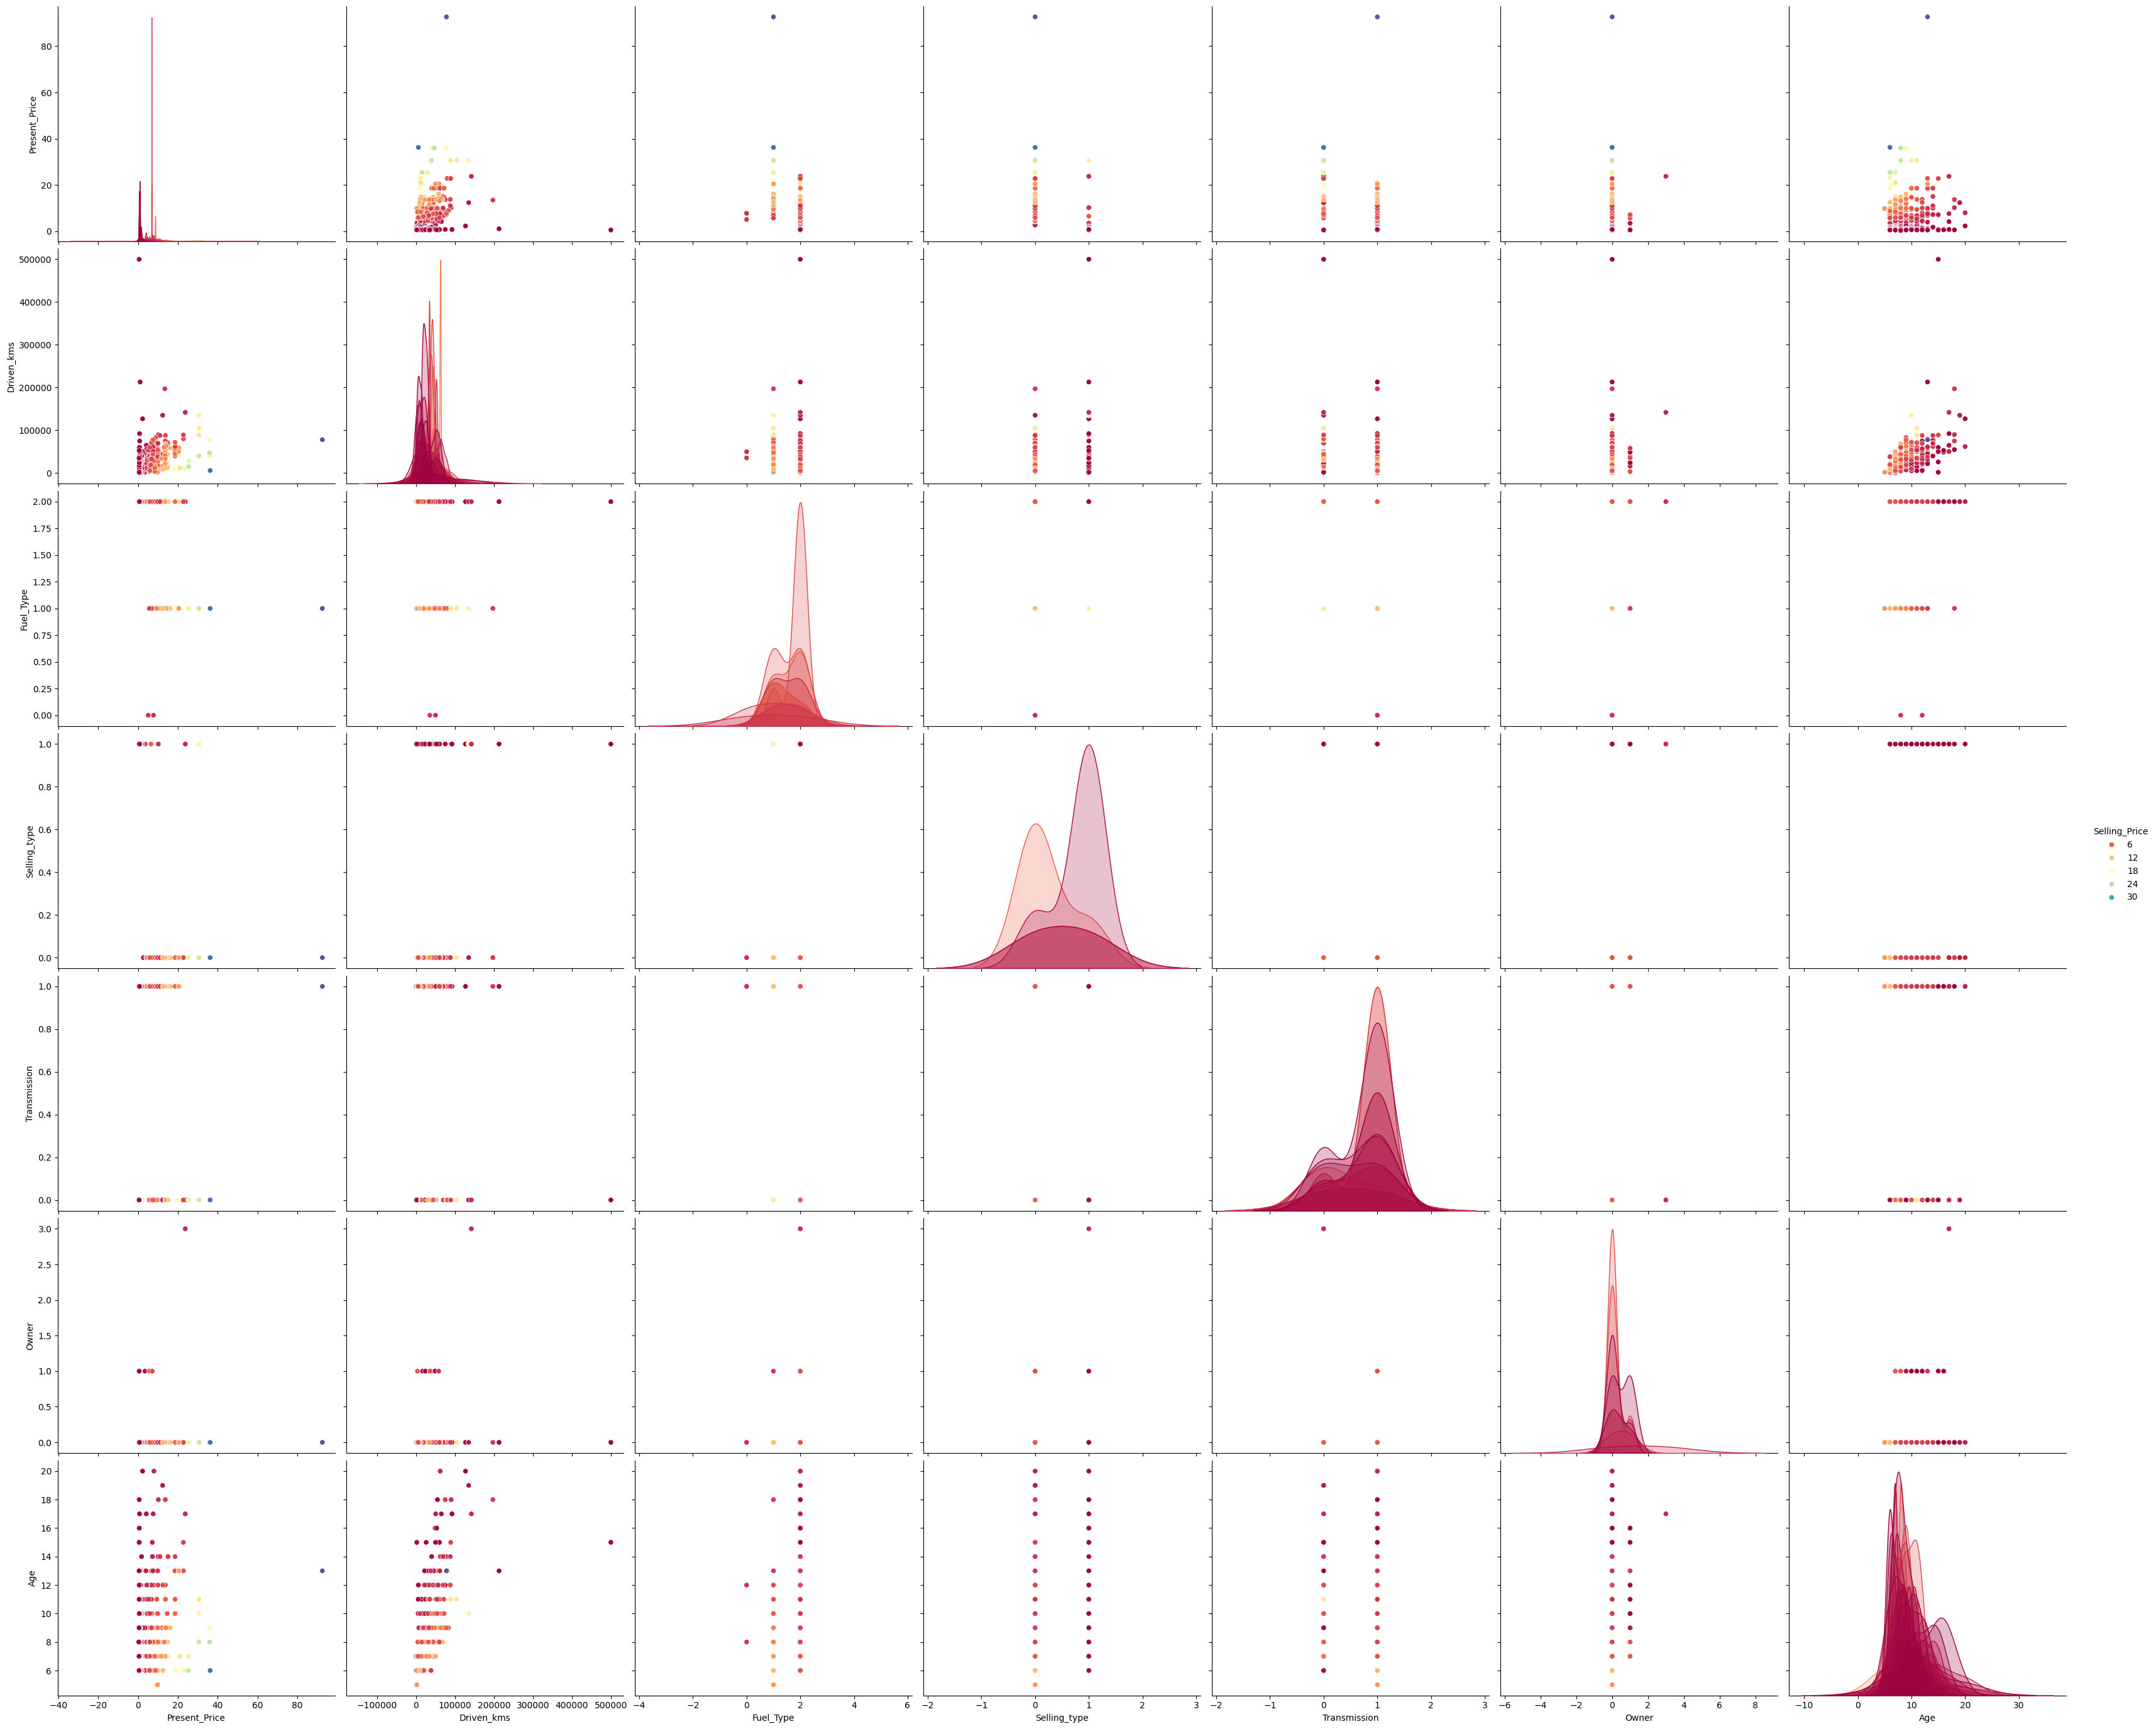

In [17]:
plt.tight_layout(pad = 1)
sns.pairplot(car_data, hue = 'Selling_Price', height = 4, aspect = 1.2, palette = 'Spectral')

<Axes: >

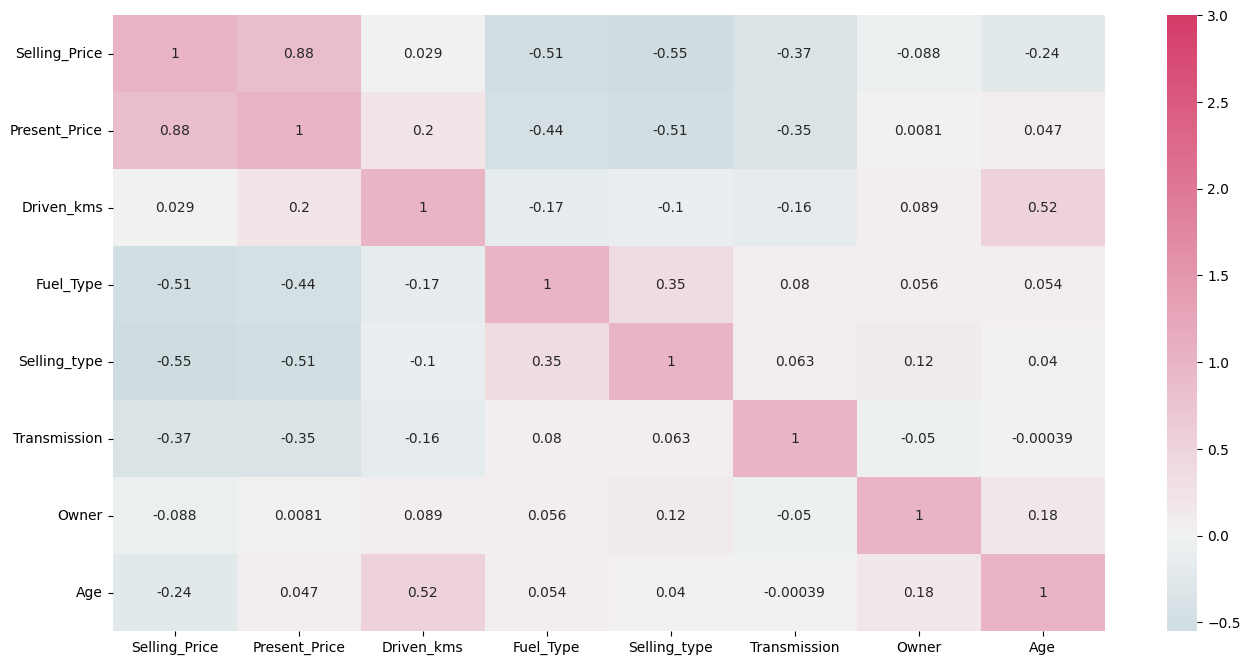

In [18]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (16,8))
cmap = sns.diverging_palette(220,0, as_cmap = True)
car_corr = car_data.drop(['Car_Name'], axis = 1)
sns.heatmap(car_corr.corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

FEATURE ENGINEERING

In [19]:
#Encoding the Car_Name Values
models = pd.get_dummies(car_data['Car_Name'], prefix = 'name',prefix_sep = '_', drop_first = True)
car_data = pd.concat([models,car_data], axis = 1)
car_data.drop(['Car_Name'], axis = 1,inplace = True)

### Scaling the Selling_Price Values
selling_price_scaler = MinMaxScaler()
car_data['Selling_Price'] = selling_price_scaler.fit_transform(np.array(car_data['Selling_Price']).reshape(-1,1))

### Scaling the Present_Price Values
present_price_scaler = MinMaxScaler()
car_data['Present_Price'] = present_price_scaler.fit_transform(np.array(car_data['Present_Price']).reshape(-1,1))

### Scaling the Driven_kms Values
kms_scaler = MinMaxScaler()
car_data['Driven_kms'] = kms_scaler.fit_transform(np.array(car_data['Driven_kms']).reshape(-1,1))

In [20]:
car_data.head()

,name_Activa 3g,name_Activa 4g,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Street 220,name_Bajaj Discover 100,name_Bajaj Discover 125,...,name_wagon r,name_xcent,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.093123,0.057109,0.053053,2,0,1,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.133238,0.099913,0.085085,1,0,1,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.204871,0.103273,0.012813,2,0,1,0,6
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0.078797,0.041504,0.009409,2,0,1,0,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.128940,0.070980,0.083984,1,0,1,0,9


SEPARATING THE FEATURES AND TARGETS

In [21]:
targets = np.array(car_data['Selling_Price'])
features_raw = car_data
features_raw = features_raw.drop(['Selling_Price'], axis = 1)
features = np.array(features_raw)

MODEL SELECTION AND HYPERPARAMETER TUNING

In [22]:
mae = []
mse =[]
r2 = []
regressor = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR()]
for i in range (7):
    for j in range (500):
        x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = j ,test_size = 0.2, shuffle = True)
        test_regressor = regressor[i]
        test_regressor.fit(x_train,y_train)
        y_predict = test_regressor.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_predict))
        mse.append(mean_squared_error(y_test,y_predict))
        r2.append(r2_score(y_test,y_predict))
        print('Trial run '+str(i+1)+'.'+str(j)+' Regressor : ' + str(test_regressor) + ' completed : MAE =  '+str(mean_absolute_error(y_test,y_predict))+ ' MSE =  '+str(mean_squared_error(y_test,y_predict))+' R2 Score =  '+str(r2_score(y_test,y_predict)))

Trial run 1.0 Regressor : LinearRegression() completed : MAE =  0.04559867543019136 MSE =  0.005801419728567148 R2 Score =  0.7204534482585077
Trial run 1.1 Regressor : LinearRegression() completed : MAE =  9345155876.844458 MSE =  1.2456955506009826e+21 R2 Score =  -6.9939011205908065e+22
Trial run 1.2 Regressor : LinearRegression() completed : MAE =  1048014532.9408946 MSE =  1.6921709642973997e+19 R2 Score =  -1.1221967534170019e+21
Trial run 1.3 Regressor : LinearRegression() completed : MAE =  1972533109.1271136 MSE =  9.777584000188434e+19 R2 Score =  -5.553815584321879e+21
Trial run 1.4 Regressor : LinearRegression() completed : MAE =  0.05843536303851063 MSE =  0.008428599483730271 R2 Score =  0.6618455723229404
Trial run 1.5 Regressor : LinearRegression() completed : MAE =  0.07704326801808678 MSE =  0.017710860617055683 R2 Score =  0.19629725938920328
Trial run 1.6 Regressor : LinearRegression() completed : MAE =  0.09554139877914426 MSE =  0.02154244548153238 R2 Score =  -0.

In [23]:
print('Lowest MAE Score = ' + str(min(mae)))
mae_location = int(mae.index(min(mae)))
mae_best_random_state = int(mae_location%500)
mae_regressor = str(regressor[int(mae_location//500)])
print ('Random State = ' + str(mae_best_random_state) + '  Regressor = ' + str(mae_regressor))

print('Lowest MSE Score = ' + str(min(mse)))
mse_location = int(mse.index(min(mse)))
mse_best_random_state = int(mse_location%500)
mse_regressor = str(regressor[int(mse_location//500)])
print ('Random State = ' + str(mse_best_random_state) + '  Regressor = ' + str(mse_regressor))

print('Best R2 Score = ' + str(max(r2)))
r2_location = int(r2.index(max(r2)))
r2_best_random_state = int(r2_location%500)
r2_regressor = str(regressor[int(r2_location//500)])
print ('Random State = ' + str(r2_best_random_state) + '  Regressor = ' + str(r2_regressor))

Lowest MAE Score = 0.009017802621071921
Random State = 68  Regressor = RandomForestRegressor()
Lowest MSE Score = 0.00019690951378498222
Random State = 482  Regressor = RandomForestRegressor()
Best R2 Score = 0.986820140951628
Random State = 67  Regressor = RandomForestRegressor()


MODEL TRAINING

In [24]:
car_price_predictor = (regressor[int(mse_location/500)])
x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = mse_best_random_state ,test_size = 0.15, shuffle = True)
car_price_predictor.fit(x_train,y_train)

RandomForestRegressor()

MODEL EVALUATION

In [25]:
y_predicted = car_price_predictor.predict(x_test)
y_predicted_rescaled = selling_price_scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test_rescaled = selling_price_scaler.inverse_transform(y_test.reshape(-1,1))

In [26]:
real_values = np.array(np.round(y_test_rescaled, 2)).tolist()
predicted_values = np.array(np.round(y_predicted_rescaled, 2)).tolist()

df = pd.DataFrame({'Actual Prices': real_values, 'Predicted Prices': predicted_values})
print ('\n')
print(df.head(20))
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (y_test_rescaled, y_predicted_rescaled)))



   Actual Prices Predicted Prices
0         [3.65]           [4.14]
1         [7.75]           [8.14]
2          [6.0]           [6.52]
3         [4.95]            [5.3]
4          [5.2]           [4.91]
5         [1.25]            [1.1]
6          [0.9]           [1.12]
7         [5.95]           [5.81]
8         [0.95]           [1.12]
9         [8.35]           [8.21]
10        [0.38]            [0.3]
11         [3.1]           [2.83]
12        [8.25]            [7.3]
13        [2.85]           [2.52]
14        [3.35]           [4.41]
15         [4.5]            [4.7]
16        [6.25]            [5.7]
17        [1.05]           [2.22]
18        [0.35]           [0.37]
19         [3.5]           [3.71]

The Mean Absolute Error is : 0.3605804347826085

The Mean Squared Error is : 0.23554939543478232

The R2 Score is : 0.9836468217761156


WHOLE CSV IMPLEMENTATION

In [27]:
targets_predicted = car_price_predictor.predict(features)
targets_predicted_resacled = selling_price_scaler.inverse_transform(targets_predicted.reshape(-1,1))
predictions = (np.round(targets_predicted_resacled, 2)).tolist()
predicted_prices = pd.Series((predictions))

In [28]:
dataset_final = cloned_car_data.reindex(columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Year', 'Age',  'Driven_kms', 'Present_Price', 'Selling_Price'])
dataset_final.head()

,Car_Name,Fuel_Type,Selling_type,Transmission,Owner,Year,Age,Driven_kms,Present_Price,Selling_Price
0,ritz,Petrol,Dealer,Manual,0,2014,9,27000,5.59,3.35
1,sx4,Diesel,Dealer,Manual,0,2013,10,43000,9.54,4.75
2,ciaz,Petrol,Dealer,Manual,0,2017,6,6900,9.85,7.25
3,wagon r,Petrol,Dealer,Manual,0,2011,12,5200,4.15,2.85
4,swift,Diesel,Dealer,Manual,0,2014,9,42450,6.87,4.60


In [29]:
dataset_final = pd.concat([dataset_final,predicted_prices],axis = 1)
dataset_final.columns.values[10] = 'Predicted_Selling_Price'
dataset_final['Predicted_Selling_Price'] = dataset_final['Predicted_Selling_Price'].astype(str)
dataset_final.head(25)

,Car_Name,Fuel_Type,Selling_type,Transmission,Owner,Year,Age,Driven_kms,Present_Price,Selling_Price,Predicted_Selling_Price
0,ritz,Petrol,Dealer,Manual,0,2014,9,27000,5.59,3.35,[4.41]
1,sx4,Diesel,Dealer,Manual,0,2013,10,43000,9.54,4.75,[5.04]
2,ciaz,Petrol,Dealer,Manual,0,2017,6,6900,9.85,7.25,[7.92]
3,wagon r,Petrol,Dealer,Manual,0,2011,12,5200,4.15,2.85,[2.52]
4,swift,Diesel,Dealer,Manual,0,2014,9,42450,6.87,4.60,[4.5]
5,vitara brezza,Diesel,Dealer,Manual,0,2018,5,2071,9.83,9.25,[8.81]
6,ciaz,Petrol,Dealer,Manual,0,2015,8,18796,8.12,6.75,[6.76]
7,s cross,Diesel,Dealer,Manual,0,2015,8,33429,8.61,6.50,[6.55]
8,ciaz,Diesel,Dealer,Manual,0,2016,7,20273,8.89,8.75,[8.17]
9,ciaz,Diesel,Dealer,Manual,0,2015,8,42367,8.92,7.45,[7.25]


THANK YOU